**As a warm up, I am trying to compare some of the variables against each other and fit into a linear regression model.**

In [857]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [858]:
dataframe = pd.read_csv('patientdata.csv') 

In [859]:
dataframe.head(10)

,Scan Number,Name,FD ROI 1 (FD-Traditional),FD ROI 1 (FD-Modified),FD ROI 2 (FD-Traditional),FD ROI (FD-Modified),Cortical Thickness Pan,Cortical Thickness Trans,BMI,Age,...,T-Score L1-L4,Low BMD Spine,Spine Osteoporosis Diagnosis,Low BMD Hip,Hip Osteoporosis Diagnosis,Unified Diagonosis,BMD Femoral Neck,T-Score Femoral Neck,BMD Total Femur,T-Score Total Femur
0,16,Adelice Leite da Silva,0.786,"1,735","1,099","1,593",3.25,3.25,2,53,...,0.1,0.0,0.0,0.0,0.0,0.0,0.978,-0.4,1.008,0.0
1,14,Adelita Alves do Espirito Santo,0.453,"1,696","1,348","1,256",3.75,3.50,1,68,...,-0.2,0.0,0.0,0.0,0.0,0.0,1.001,-0.3,1.054,0.4
2,84,Alice Pereira Miranda,"1,636","1,885",0.876,"1,793",3.25,3.25,1,52,...,0.9,0.0,0.0,0.0,0.0,0.0,1.177,1.0,1.186,1.4
3,17,Alzira Alves da Silva,"1,215","1,566","1,285","1,545",2.75,2.50,2,60,...,-2.9,1.0,1.0,0.0,0.0,1.0,0.940,-0.7,0.909,-0.8
4,79,Amariles de Sousa Maia,"1,807","1,933","1,120","1,892",2.75,2.75,2,53,...,-3.4,1.0,1.0,1.0,1.0,1.0,0.607,-3.1,0.714,-2.3
5,82,Ana Maria Braz de Oliveira,0.602,"1,812",-0.030,"1,421",3.50,3.75,1,53,...,-2.7,1.0,1.0,0.0,0.0,1.0,0.861,-1.3,0.814,-1.5
6,88,Ana Marta Oliveira de Pinho,0.733,"1,836",0.917,"1,706",3.75,3.75,2,56,...,0.5,0.0,0.0,0.0,0.0,0.0,1.143,0.8,1.182,1.4
7,102,Ana Siqueira Alves Soares,0.869,"2,025","1,211","1,843",3.50,3.25,2,71,...,-3.2,1.0,1.0,0.0,0.0,1.0,0.826,-1.5,0.792,-1.7
8,101,Anália Martins Pinto,"1,037","1,756","1,877","1,793",3.25,3.25,1,72,...,0.2,0.0,0.0,0.0,0.0,0.0,1.043,0.0,1.135,1.0
9,27,Andrea Alves Queiroz,"1,243","1,940","1,011","1,899",2.50,2.50,1,60,...,-0.8,0.0,0.0,0.0,0.0,0.0,0.872,-1.2,0.976,-0.3


In [860]:
dataframe.columns.to_list()

['Scan Number',
 'Name',
 'FD ROI 1 (FD-Traditional)',
 'FD ROI 1 (FD-Modified)',
 'FD ROI 2 (FD-Traditional)',
 'FD ROI  (FD-Modified)',
 'Cortical Thickness Pan',
 'Cortical Thickness Trans',
 'BMI',
 'Age',
 'Height',
 'Weight',
 'BMD L1-L4',
 'T-Score L1-L4',
 'Low BMD Spine',
 'Spine Osteoporosis Diagnosis',
 'Low BMD Hip',
 'Hip Osteoporosis Diagnosis',
 'Unified Diagonosis',
 'BMD Femoral Neck',
 'T-Score Femoral Neck',
 'BMD Total Femur',
 'T-Score Total Femur']

# **Dataset Description: Osteoporosis and Bone Health Analysis**
Date: Monday, March 10

## **Overview**
This dataset contains patient information, bone mineral density (BMD) measurements, fractal dimension (FD) values, and osteoporosis diagnoses. It is used to analyze risk factors and predict osteoporosis using machine learning.

## **Key Features**
- **Patient Information**: Age, BMI, height, weight.
- **Bone Density Measurements**:
  - **BMD (g/cm²)** and **T-Scores** for **L1-L4 spine, femoral neck, and total femur**.
  - Higher BMD and T-scores indicate stronger bones.
- **Fractal Dimension (FD) Values**: Measures bone microarchitecture in different regions.
- **Cortical Thickness**: Thickness of the outer bone layer (panoramic and transversal views).
- **Osteoporosis Diagnosis (Binary)**:
  - **Spine & Hip Osteoporosis**: 1 = Diagnosed, 0 = Not diagnosed.
  - **Unified Diagnosis**: 1 if osteoporosis is present in any major bone site.

## **Usage**
This dataset is analyzed using regression to analyze osteoporosis possibilities based on BMD, T-Scores, and patient characteristics.


Text(0, 0.5, 'BMD L1-L4')

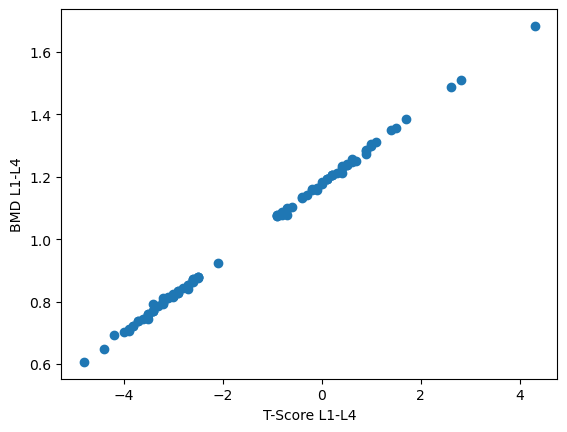

In [861]:
plt.scatter(dataframe['T-Score L1-L4'], dataframe['BMD L1-L4'])
plt.xlabel("T-Score L1-L4")
plt.ylabel("BMD L1-L4")

**This shows how the bone mass density of region L1-L4 is obviously directly dependent on the T-score of L1-L4. Let's Explore some more of these relationships.**

In [862]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Text(0, 0.5, 'BMD Femoral Neck')

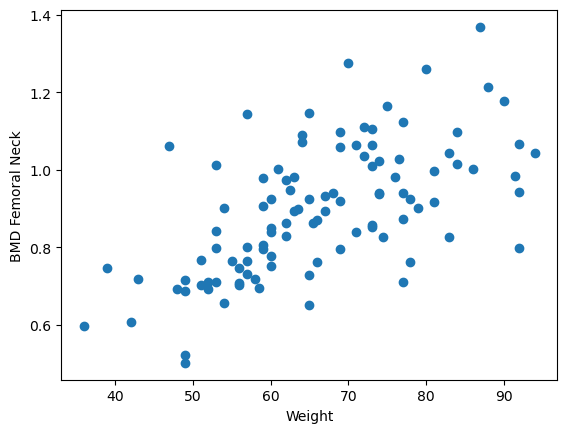

In [863]:
plt.scatter(dataframe['Weight'], dataframe['BMD Femoral Neck'])
plt.xlabel("Weight")
plt.ylabel("BMD Femoral Neck")



**It seems that there might be a decent correlation between BMD of the Femoral Neck area and the Weight of people( and low BMD of this reason might be associated with increased osteoporosis risk), so let's dive in, fitting the line of best fit to see how well these two features correlate.**

In [864]:
X  = dataframe[["Weight"]].values
Y  = dataframe[["BMD Femoral Neck"]].values
model = LinearRegression()
model.fit(X, Y)
print(f"The Accuracy of our Weight based BMD Femoral Neck prediction model is {model.score(X, Y) * 100:.2f} %")




The Accuracy of our Weight based BMD Femoral Neck prediction model is 37.19 %


In [865]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [866]:
X_train = X[:-20]
X_test = X[-20:]
Y_train = Y[:-20]
Y_test = Y[-20:]

In [867]:
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression()

In [868]:
Y_Predicted = regr.predict(X_test)
print("Coefficients: \n", regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_Predicted))
print("Coefficient of determination: %.2f" % r2_score(Y_test, Y_Predicted))

Coefficients: 
 [[0.00795671]]
Mean squared error: 0.01
Coefficient of determination: 0.37


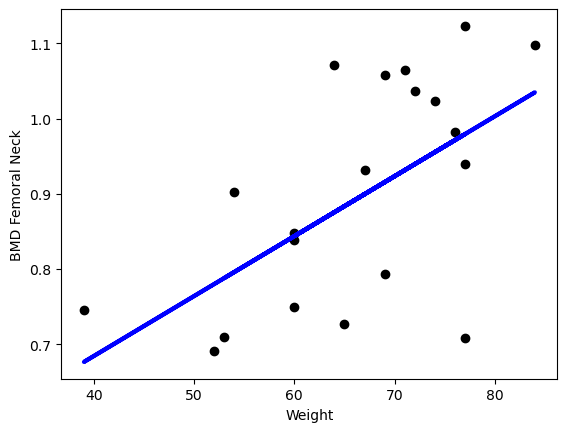

In [869]:
plt.scatter(X_test, Y_test, color="black")
plt.plot(X_test, Y_Predicted, color="blue", linewidth=3)
plt.xlabel("Weight")
plt.ylabel("BMD Femoral Neck")
plt.show()

Date: March 11, Tuesday  
## **Now, Let's try using Logistic Regression to predict the target variable(Unified diagnosis). There are lots of commas in the patient data in four of the columns instead of '.' for floating point value representation. Thus, I am trying to replace those commas with the '.''s and then casting to float values from their object data types.**

In [870]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [871]:
dataframe["FD ROI 1 (FD-Traditional)"] = dataframe["FD ROI 1 (FD-Traditional)"].str.replace(',', '.', regex=True).astype(float)
dataframe["FD ROI 1 (FD-Modified)"] = dataframe["FD ROI 1 (FD-Modified)"].str.replace(',', '.', regex=True).astype(float)
dataframe["FD ROI 2 (FD-Traditional)"] = dataframe["FD ROI 2 (FD-Traditional)"].str.replace(',', '.', regex=True).astype(float)
dataframe["FD ROI  (FD-Modified)"] = dataframe["FD ROI  (FD-Modified)"].str.replace(',', '.', regex=True).astype(float)
dataframe.head()



,Scan Number,Name,FD ROI 1 (FD-Traditional),FD ROI 1 (FD-Modified),FD ROI 2 (FD-Traditional),FD ROI (FD-Modified),Cortical Thickness Pan,Cortical Thickness Trans,BMI,Age,...,T-Score L1-L4,Low BMD Spine,Spine Osteoporosis Diagnosis,Low BMD Hip,Hip Osteoporosis Diagnosis,Unified Diagonosis,BMD Femoral Neck,T-Score Femoral Neck,BMD Total Femur,T-Score Total Femur
0,16,Adelice Leite da Silva,0.786,1.735,1.099,1.593,3.25,3.25,2,53,...,0.1,0.0,0.0,0.0,0.0,0.0,0.978,-0.4,1.008,0.0
1,14,Adelita Alves do Espirito Santo,0.453,1.696,1.348,1.256,3.75,3.50,1,68,...,-0.2,0.0,0.0,0.0,0.0,0.0,1.001,-0.3,1.054,0.4
2,84,Alice Pereira Miranda,1.636,1.885,0.876,1.793,3.25,3.25,1,52,...,0.9,0.0,0.0,0.0,0.0,0.0,1.177,1.0,1.186,1.4
3,17,Alzira Alves da Silva,1.215,1.566,1.285,1.545,2.75,2.50,2,60,...,-2.9,1.0,1.0,0.0,0.0,1.0,0.940,-0.7,0.909,-0.8
4,79,Amariles de Sousa Maia,1.807,1.933,1.120,1.892,2.75,2.75,2,53,...,-3.4,1.0,1.0,1.0,1.0,1.0,0.607,-3.1,0.714,-2.3


In [872]:
#Dropping these indices because there is Excludia written in those rows.


x = dataframe.drop(columns=['Unified Diagonosis','Scan Number','Name'], index=[47, 65, 88]) 
y = dataframe['Unified Diagonosis'].drop(index=[47, 65, 88])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)   

##Dropping all the null values
x_train = x_train.dropna()  
y_train = y_train[x_train.index]  

x_test = x_test.dropna()  
y_test = y_test[x_test.index]  

print("Missing values in X_train:", x_train.isnull().sum())
print("Missing values in X_test:", x_test.isnull().sum())
print("Missing values in y_train:", y_train.isnull().sum())
print("Missing values in y_test:", y_test.isnull().sum())


Missing values in X_train: FD ROI 1 (FD-Traditional)       0
FD ROI 1 (FD-Modified)          0
FD ROI 2 (FD-Traditional)       0
FD ROI  (FD-Modified)           0
Cortical Thickness Pan          0
Cortical Thickness Trans        0
BMI                             0
Age                             0
Height                          0
Weight                          0
BMD L1-L4                       0
T-Score L1-L4                   0
Low BMD Spine                   0
Spine Osteoporosis Diagnosis    0
Low BMD Hip                     0
Hip Osteoporosis Diagnosis      0
BMD Femoral Neck                0
T-Score Femoral Neck            0
BMD Total Femur                 0
T-Score Total Femur             0
dtype: int64
Missing values in X_test: FD ROI 1 (FD-Traditional)       0
FD ROI 1 (FD-Modified)          0
FD ROI 2 (FD-Traditional)       0
FD ROI  (FD-Modified)           0
Cortical Thickness Pan          0
Cortical Thickness Trans        0
BMI                             0
Age             

In [873]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)


LogisticRegression(max_iter=1000)

In [874]:
y_pred = model.predict(x_test)


In [875]:
print("Accuracy:", accuracy_score(y_test, y_pred))


from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")




Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


 **Now, it can be observed that the regression classification is behaving very poorly. My initial guess of this catastrophe would be underfitting. Our model did not behave quite well because we have too many features in play, so I'll try to come up with some remedy.**      Update:  I figured out I could reduce features to improve my model. I'll use a correlation matrix to find which data are more relevant and select them for my model.
 Update:
 I changed some of the code and now the accuracy is 100% and I don't have idea why is it behaving this way.

In [882]:
X_cleaned = x.dropna()
y_cleaned = y[X_cleaned.index]
model = LogisticRegression(max_iter=1000)

# Perform cross-validation
cv_scores = cross_val_score(model, X_cleaned, y_cleaned, cv=5, scoring='accuracy')  # 5-fold cross-validation

# Print cross-validation scores and the mean score
print("Mean cross-validation score:", cv_scores.mean())


Mean cross-validation score: 0.9846153846153847


Text(0.5, 0, 'T-Score Femoral Neck')

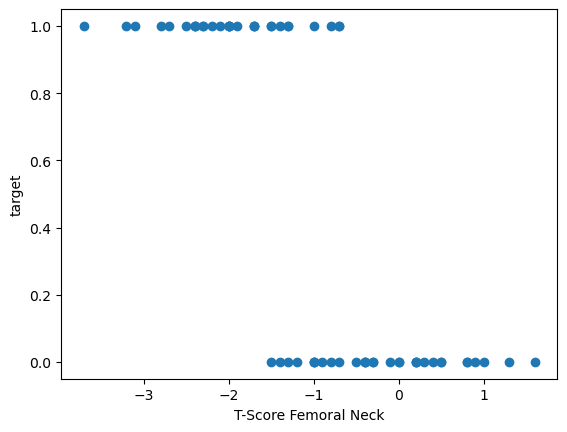

In [892]:
plt.scatter(X_cleaned['T-Score Femoral Neck'],y_cleaned)
plt.ylabel("target")
plt.xlabel("T-Score Femoral Neck")


Text(0.5, 0, 'T-Score L1-L4')

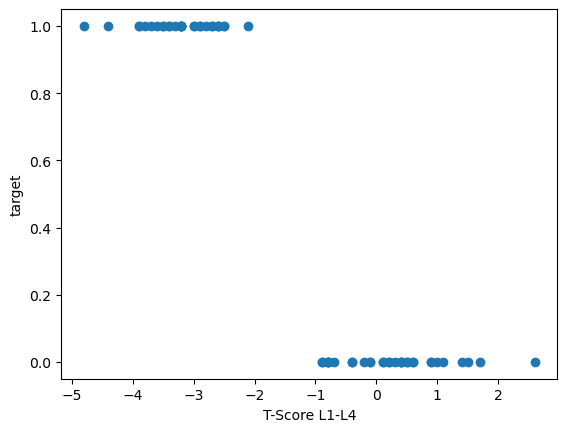

In [893]:
plt.scatter(X_cleaned['T-Score L1-L4'],y_cleaned)
plt.ylabel("target")
plt.xlabel("T-Score L1-L4")

Text(0.5, 0, 'T-Score Femoral Neck')

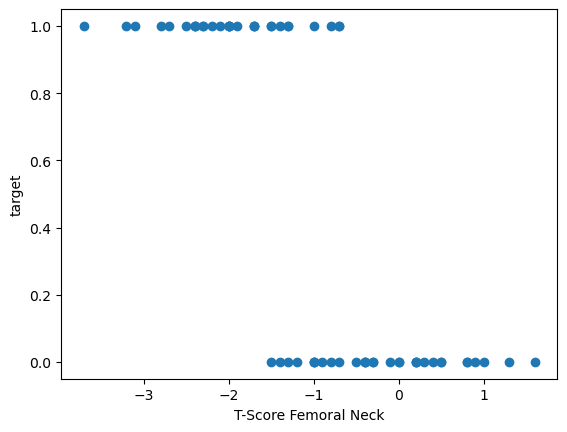

In [896]:
plt.scatter(X_cleaned['T-Score Femoral Neck'],y_cleaned)
plt.ylabel("target")
plt.xlabel("T-Score Femoral Neck")

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

<Axes: >

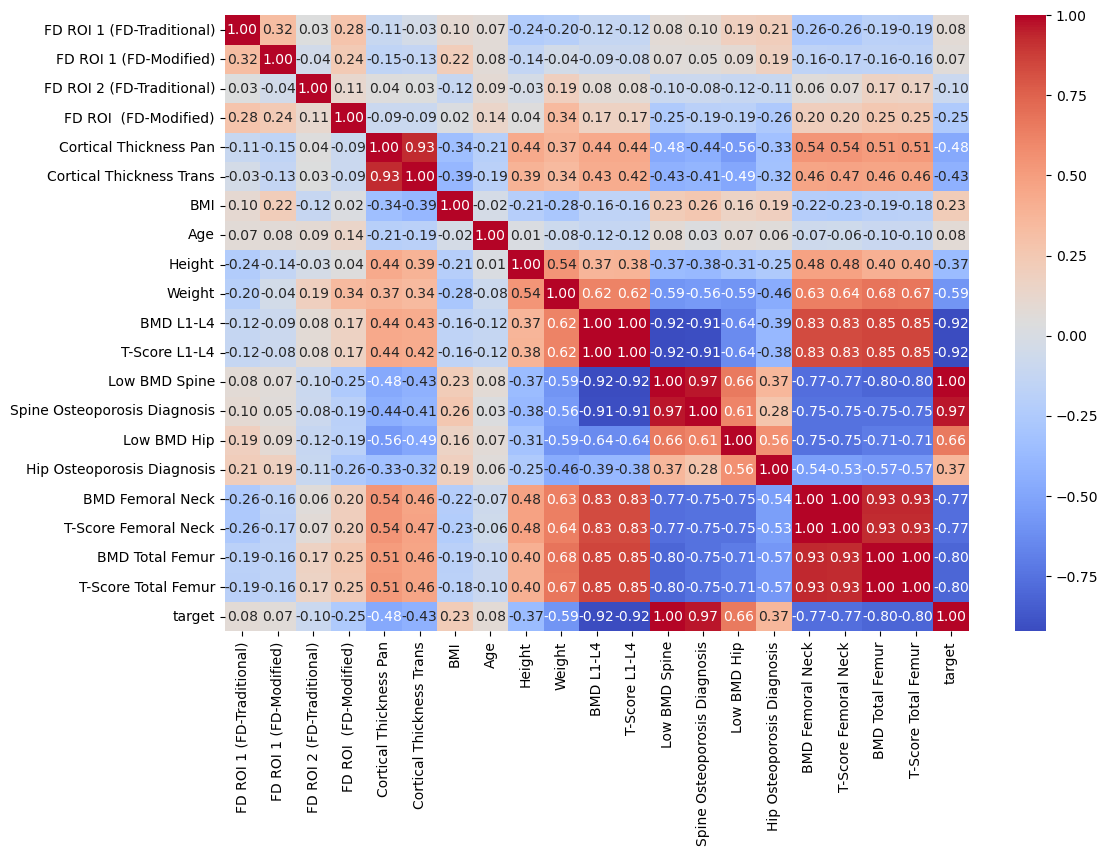

In [883]:
# Combine X and Y into a single DataFrame
test_data = X_cleaned.copy()
test_data['target'] = y_cleaned

plt.figure(figsize  = (12, 8))
sn.heatmap(corr_matrix, annot = True, cmap = "coolwarm", fmt = ".2f")

**Now, From the heatmap, it's highly evident that the T-Score of the Femoral Neck region is the most successful correlating factor with the Target variable(which is the unified diagonosis). Also, let's see what happens when we pick our top five features and use it for training."**

In [ ]:
selected_features = ["Cortical Thickness Pan",
                   "BMD L1-L4", "T-Score L1-L4", "BMD Femoral Neck",
                   "T-Score Femoral Neck"]

# Update X_train and X_test with selected features
x_train_updated = x_train[selected_features]
x_test_updated = x_test[selected_features]  # Ensure test set has same features

In [ ]:

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(x_train_updated, y_train)  # Use correct target variable

# Make predictions
y_pred = model.predict(x_test_updated)


In [ ]:
# Print Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

**For some reason, I couldn't achieve what I expected, and my troubleshooting skill did not work here. That being said, I'll be back with solution to this for sure. For now, I am going to learn a new supervised machine learning model and try that to this work**

Date: March 13 Update: I found a github repo doing a very similar work as me and I'm taking their approach to try and solve my problem.

In [ ]:
dataframe.isnull().sum()

In [ ]:
dataframe.update(dataframe[["Low BMD Spine", "Spine Osteoporosis Diagnosis",
                            "Hip Osteoporosis Diagnosis", "Unified Diagonosis", "Low BMD Hip"]].fillna(0))


In [ ]:
dataframe.isnull().sum()

In [ ]:
x = dataframe.drop(columns=['Unified Diagonosis','Scan Number','Name'])
y = dataframe['Unified Diagonosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)   



In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))